In [2]:
import pandas as pd
import networkx as nx

In [3]:
#import dataframe
df = pd.read_csv("dataset_penyanyi_dbpedia.csv")
df

,nama,genre,asal
0,Acha Septriasa,http://id.dbpedia.org/resource/Pop,"Jakarta,"
1,Acha Septriasa,http://id.dbpedia.org/resource/Soundtrack,"Jakarta,"
2,Agnes Monica,http://id.dbpedia.org/resource/R&B,"Jakarta, Indonesia"
3,Agnes Monica,http://id.dbpedia.org/resource/Pop,"Jakarta, Indonesia"
4,Ahmad Albar,http://id.dbpedia.org/resource/Pop,"Surabaya,Indonesia"
...,...,...,...
95,Alda Risma,http://id.dbpedia.org/resource/Jazz,"Bogor, Indonesia"
96,Enno Lerian,http://id.dbpedia.org/resource/Pop,"Lampung, Bandar Lampung, Indonesia"
97,Denada,http://id.dbpedia.org/resource/Dangdut,"Jakarta, DKI Jakarta, Indonesia"
98,Denada,http://id.dbpedia.org/resource/Rap,"Jakarta, DKI Jakarta, Indonesia"


In [4]:
gp= nx.from_pandas_edgelist(df, source='nama', target='genre')
df2= df[['nama', 'asal']].dropna(axis = 0, how ='any')
list_penyanyi = df2.values.tolist()
gp.add_edges_from(list_penyanyi)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style('whitegrid')
gp.add_edges_from(list_penyanyi, weight=1, label="asal_penyanyi")
labels = [i for i in dict(gp.nodes).keys()]
labels = {i:i for i in dict(gp.nodes).keys()}
labels

{'Acha Septriasa': 'Acha Septriasa',
 'http://id.dbpedia.org/resource/Pop': 'http://id.dbpedia.org/resource/Pop',
 'http://id.dbpedia.org/resource/Soundtrack': 'http://id.dbpedia.org/resource/Soundtrack',
 'Agnes Monica': 'Agnes Monica',
 'http://id.dbpedia.org/resource/R&B': 'http://id.dbpedia.org/resource/R&B',
 'Ahmad Albar': 'Ahmad Albar',
 'http://id.dbpedia.org/resource/Rock': 'http://id.dbpedia.org/resource/Rock',
 'Andi Meriem Matalatta': 'Andi Meriem Matalatta',
 'Anneke Grönloh': 'Anneke Grönloh',
 'http://id.dbpedia.org/resource/Big_band': 'http://id.dbpedia.org/resource/Big_band',
 'http://id.dbpedia.org/resource/Etnik': 'http://id.dbpedia.org/resource/Etnik',
 'http://id.dbpedia.org/resource/Folk': 'http://id.dbpedia.org/resource/Folk',
 'A. Rafiq': 'A. Rafiq',
 'http://id.dbpedia.org/resource/Dangdut': 'http://id.dbpedia.org/resource/Dangdut',
 'Ari Lasso': 'Ari Lasso',
 'http://id.dbpedia.org/resource/Pop_rock': 'http://id.dbpedia.org/resource/Pop_rock',
 'Benyamin Sueb'

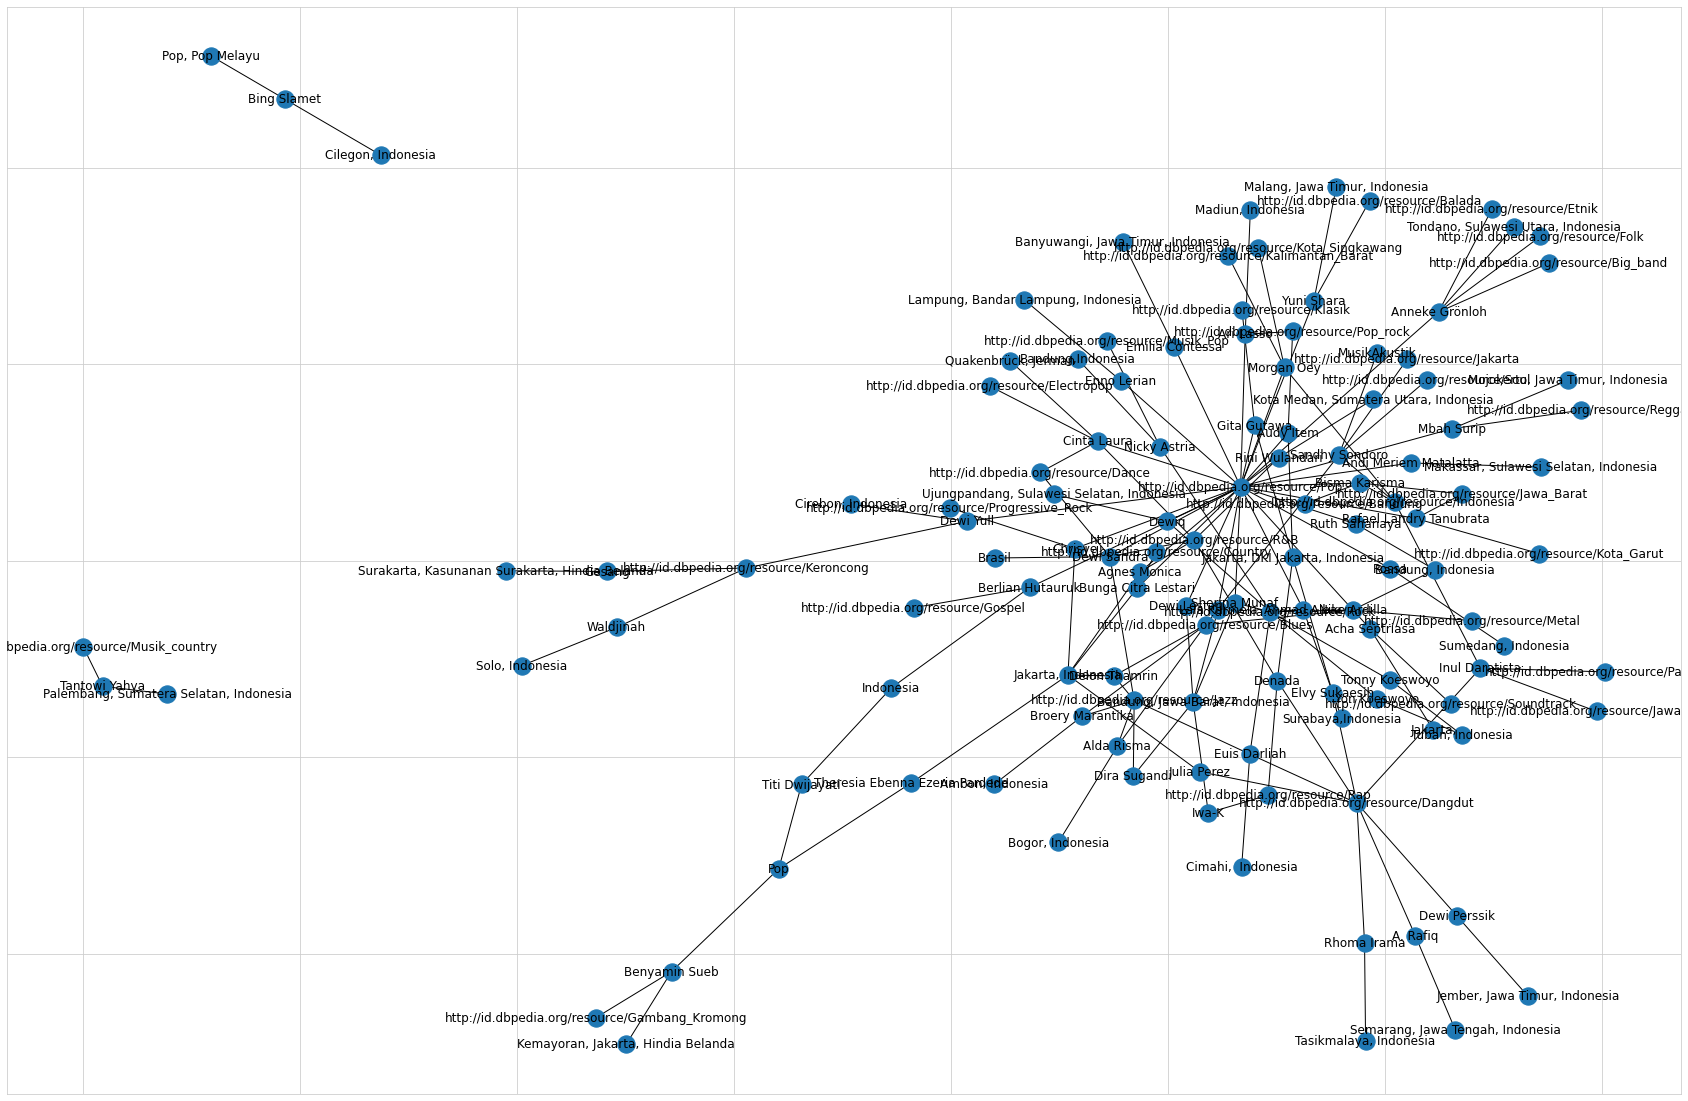

In [7]:
#menampilkan pemodelan graph
fig, ax = plt.subplots(figsize=(30,20))
layout = nx.spring_layout(gp,iterations=50)
nx.draw_networkx_nodes(gp, layout, ax = ax, labels=True)
nx.draw_networkx_edges(gp, layout, ax=ax)
_ = nx.draw_networkx_labels(gp, layout, labels, ax=ax)

In [8]:
#density graph
density = nx.density(gp)
print("Network Density", density)

Network Density 0.01980068187778652


In [9]:
#menjalankan algoritma degree centrality
degree_dict = dict(gp.degree(gp.nodes()))
degree_dict

{'Acha Septriasa': 3,
 'http://id.dbpedia.org/resource/Pop': 28,
 'http://id.dbpedia.org/resource/Soundtrack': 1,
 'Agnes Monica': 3,
 'http://id.dbpedia.org/resource/R&B': 5,
 'Ahmad Albar': 3,
 'http://id.dbpedia.org/resource/Rock': 8,
 'Andi Meriem Matalatta': 2,
 'Anneke Grönloh': 5,
 'http://id.dbpedia.org/resource/Big_band': 1,
 'http://id.dbpedia.org/resource/Etnik': 1,
 'http://id.dbpedia.org/resource/Folk': 1,
 'A. Rafiq': 2,
 'http://id.dbpedia.org/resource/Dangdut': 8,
 'Ari Lasso': 3,
 'http://id.dbpedia.org/resource/Pop_rock': 2,
 'Benyamin Sueb': 3,
 'http://id.dbpedia.org/resource/Gambang_Kromong': 1,
 'Pop': 3,
 'Berlian Hutauruk': 3,
 'http://id.dbpedia.org/resource/Gospel': 1,
 'Bing Slamet': 2,
 'Pop, Pop Melayu': 1,
 'Bisma Karisma': 4,
 'Broery Marantika': 3,
 'http://id.dbpedia.org/resource/Blues': 5,
 'http://id.dbpedia.org/resource/Jazz': 6,
 'Bunga Citra Lestari': 3,
 'http://id.dbpedia.org/resource/Country': 1,
 'Chrisye': 3,
 'http://id.dbpedia.org/resource/P

In [14]:
eigenvector_dict = nx.closeness_centrality(gp)
urutan_eigen= sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Lima besar EigenVector centrality:")
for b in urutan_eigen[:5]:
    print(b)

Lima besar EigenVector centrality:
('http://id.dbpedia.org/resource/Pop', 0.3798385082826937)
('Sherina Munaf', 0.3065914130215682)
('Dewi Sandra', 0.30491146007350484)
('Ahmad Albar', 0.30160618679357526)
('Dewiq', 0.30160618679357526)


(-0.5620392762285807,
 1.0743828226775514,
 -0.6195023527467103,
 0.49780012266243123)

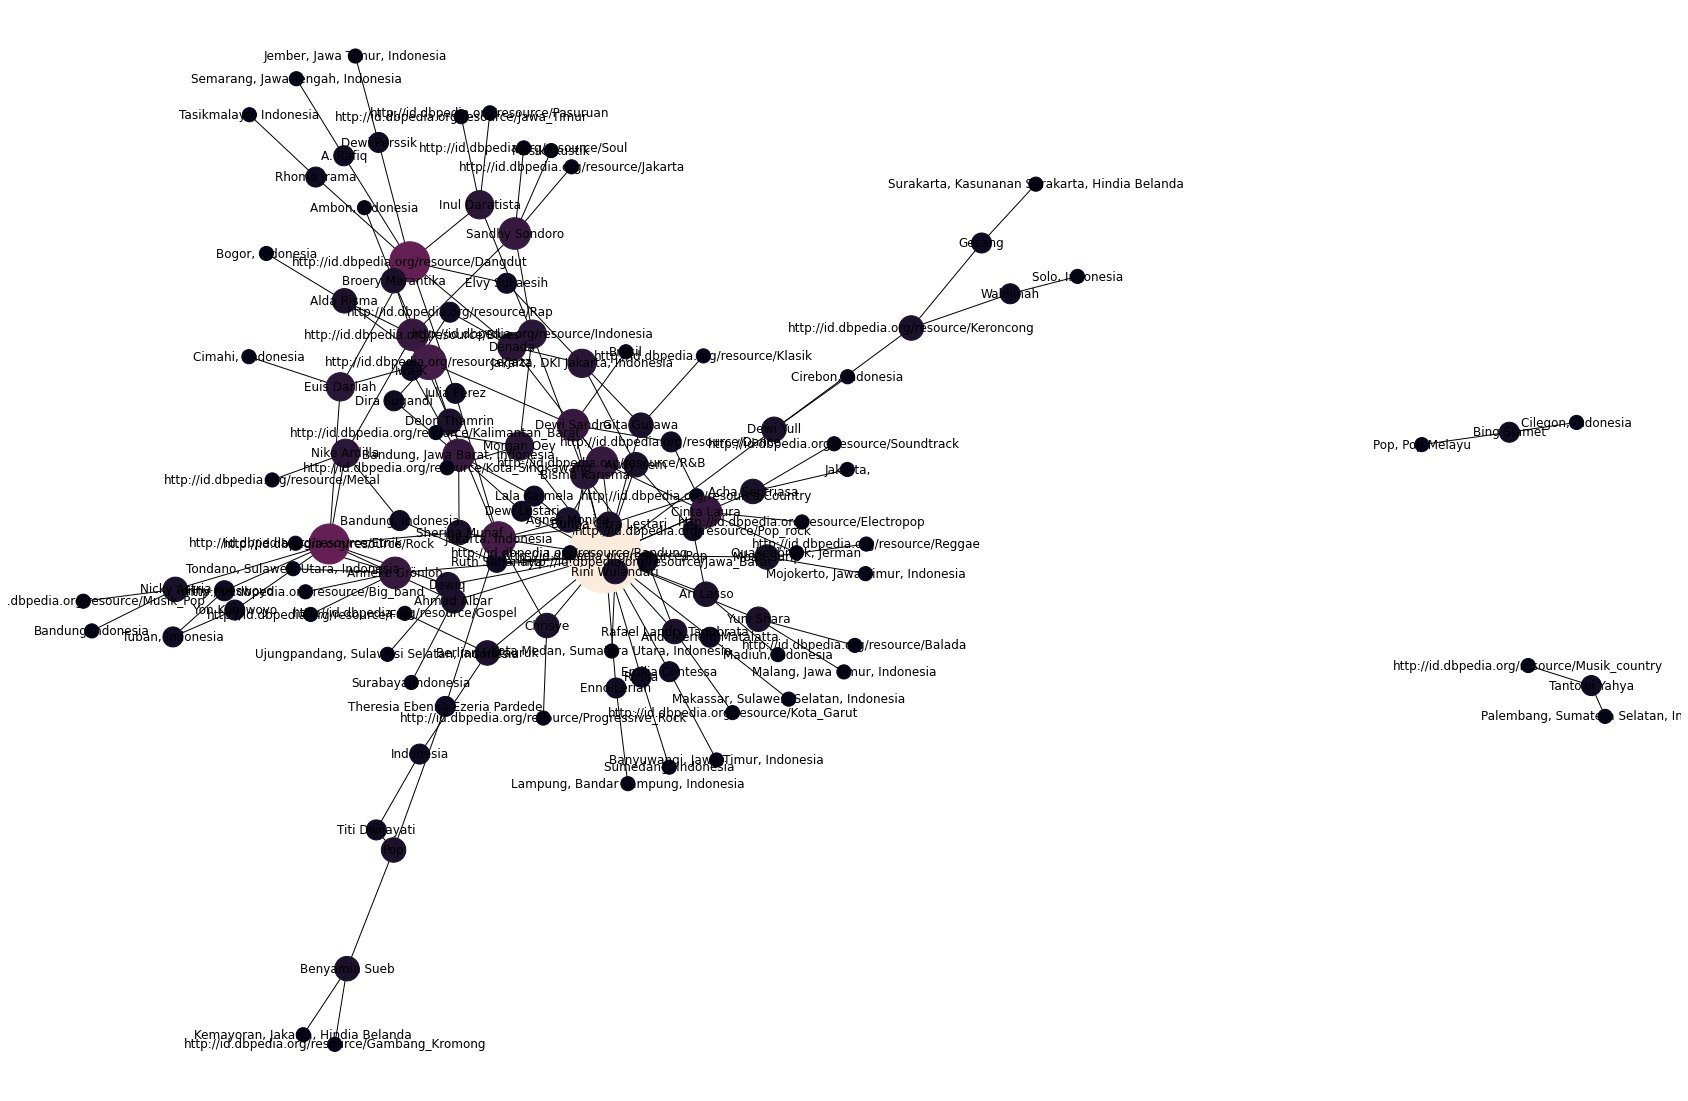

In [10]:
#menampilkan graph degree centrality
import matplotlib.pyplot as plt
pos = nx.spring_layout(gp)
node_color = [2000.0 * gp.degree(value) for value in gp]
node_size = [value * 200 for value in degree_dict.values()]
plt.figure(figsize=(30,20))
nx.draw_networkx(gp, pos=pos, with_labels=True, node_color=node_color, node_size=node_size )
plt.axis('off')

In [11]:
#urutan Top 10 Degree
from operator import itemgetter
urutan_degree= sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 Degree:")
for b in urutan_degree[:10]:
    print(b)

Top 10 Degree:
('http://id.dbpedia.org/resource/Pop', 28)
('http://id.dbpedia.org/resource/Rock', 8)
('http://id.dbpedia.org/resource/Dangdut', 8)
('http://id.dbpedia.org/resource/Jazz', 6)
('Jakarta, Indonesia', 6)
('http://id.dbpedia.org/resource/R&B', 5)
('Anneke Grönloh', 5)
('http://id.dbpedia.org/resource/Blues', 5)
('Cinta Laura', 5)
('Dewi Sandra', 5)


In [13]:
#menjalankan algoritman Node2Vec
from node2vec import Node2Vec
node2vec = Node2Vec(gp, dimensions=20, walk_length=16, num_walks=100, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 124/124 [00:00<00:00, 3360.30it/s]


In [14]:
model = node2vec.fit(window=10, min_count=1)

In [15]:
for node, _ in model.most_similar('http://id.dbpedia.org/resource/Rock'):
    print(node)

Yon Koeswoyo
Tonny Koeswoyo
Tuban, Indonesia
Ahmad Albar
Nicky Astria
Sherina Munaf
Surabaya,Indonesia
Dewiq
Nike Ardilla
http://id.dbpedia.org/resource/Musik_Pop


C:\Users\rsln2\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [16]:
from sklearn.manifold import TSNE
import numpy as np

In [17]:
#embedding penyanyi saja
nodepenyanyi = [x for x in df.nama]
print(nodepenyanyi)

['Acha Septriasa', 'Acha Septriasa', 'Agnes Monica', 'Agnes Monica', 'Ahmad Albar', 'Ahmad Albar', 'Andi Meriem Matalatta', 'Anneke Grönloh', 'Anneke Grönloh', 'Anneke Grönloh', 'Anneke Grönloh', 'A. Rafiq', 'Ari Lasso', 'Ari Lasso', 'Benyamin Sueb', 'Benyamin Sueb', 'Berlian Hutauruk', 'Berlian Hutauruk', 'Bing Slamet', 'Bisma Karisma', 'Bisma Karisma', 'Bisma Karisma', 'Broery Marantika', 'Broery Marantika', 'Bunga Citra Lestari', 'Bunga Citra Lestari', 'Chrisye', 'Chrisye', 'Cinta Laura', 'Cinta Laura', 'Cinta Laura', 'Cinta Laura', 'Dewi Lestari', 'Dewi Perssik', 'Dewiq', 'Dewiq', 'Dewi Sandra', 'Dewi Sandra', 'Dewi Sandra', 'Dewi Sandra', 'Dira Sugandi', 'Elvy Sukaesih', 'Gesang', 'Gita Gutawa', 'Gita Gutawa', 'Inul Daratista', 'Inul Daratista', 'Inul Daratista', 'Iwa-K', 'Julia Perez', 'Lala Karmela', 'Mbah Surip', 'Mbah Surip', 'Morgan Oey', 'Morgan Oey', 'Morgan Oey', 'Nicky Astria', 'Nicky Astria', 'Nike Ardilla', 'Nike Ardilla', 'Nike Ardilla', 'Rafael Landry Tanubrata', 'Raf

In [18]:
embeddings = np.array([model.wv[x] for x in nodepenyanyi])
print(embeddings)

[[-0.14908421  0.1298429  -0.38039294 ...  0.7038791   1.2536775
  -0.52561677]
 [-0.14908421  0.1298429  -0.38039294 ...  0.7038791   1.2536775
  -0.52561677]
 [ 0.03711769 -1.2541758   1.3157349  ... -0.15742998 -0.42095485
  -1.2588879 ]
 ...
 [ 1.9525044   0.4938682   0.2920661  ...  1.2372211  -2.313819
   0.71999735]
 [ 1.9525044   0.4938682   0.2920661  ...  1.2372211  -2.313819
   0.71999735]
 [ 1.9525044   0.4938682   0.2920661  ...  1.2372211  -2.313819
   0.71999735]]


In [19]:
#menampilkan visualisasi
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [20]:
warna_genre = {
        'http://id.dbpedia.org/resource/Balada' : 'silver',
    'http://id.dbpedia.org/resource/Big_band' : 'black',
    'http://id.dbpedia.org/resource/Blues' : 'rosybrown',
    'http://id.dbpedia.org/resource/Country' : 'brown',
    'http://id.dbpedia.org/resource/Dance' : 'orangered',
    'http://id.dbpedia.org/resource/Dangdut' : 'chocolate',
    'http://id.dbpedia.org/resource/Electropop' : 'tan',
    'http://id.dbpedia.org/resource/Etnik' : 'wheat',
    'http://id.dbpedia.org/resource/Folk' : 'goldenrod',
    'http://id.dbpedia.org/resource/Gambang_Kromong' : 'olive',
    'http://id.dbpedia.org/resource/Gospel' : 'yellowgreen',
    'http://id.dbpedia.org/resource/Jazz' : 'lawngreen',
    'http://id.dbpedia.org/resource/Keroncong' : 'palegreen', 
    'http://id.dbpedia.org/resource/Klasik' : 'limegreen',
    'http://id.dbpedia.org/resource/Metal' : 'aquamarine',
    'http://id.dbpedia.org/resource/Musik_country' : 'lightseagreen',
    'http://id.dbpedia.org/resource/Musik_Pop' : 'teal',
    'http://id.dbpedia.org/resource/Pop' : 'red',
    'http://id.dbpedia.org/resource/Pop_rock' : 'lightblue',
    'http://id.dbpedia.org/resource/Progressive_Rock' : 'steelblue',
    'http://id.dbpedia.org/resource/R&B' : 'dodgerblue',
    'http://id.dbpedia.org/resource/Rap' : 'lightsteelblue',
    'http://id.dbpedia.org/resource/Reggae' : 'navy',
    'http://id.dbpedia.org/resource/Rock' : 'gold',
    'http://id.dbpedia.org/resource/Soul' : 'blue',
    'http://id.dbpedia.org/resource/Soundtrack' : 'darkviolet',
    'MusikAkustik' : 'violet',
    'Pop' : 'crimson',
    'Pop, Pop Melayu' : 'palevioletred'}

df['color'] = df['genre'].apply(lambda x: warna_genre[x])
warna_penyanyi= dict(zip(df['nama'], df['color']))
colors = [warna_penyanyi[x] for x in df.nama]

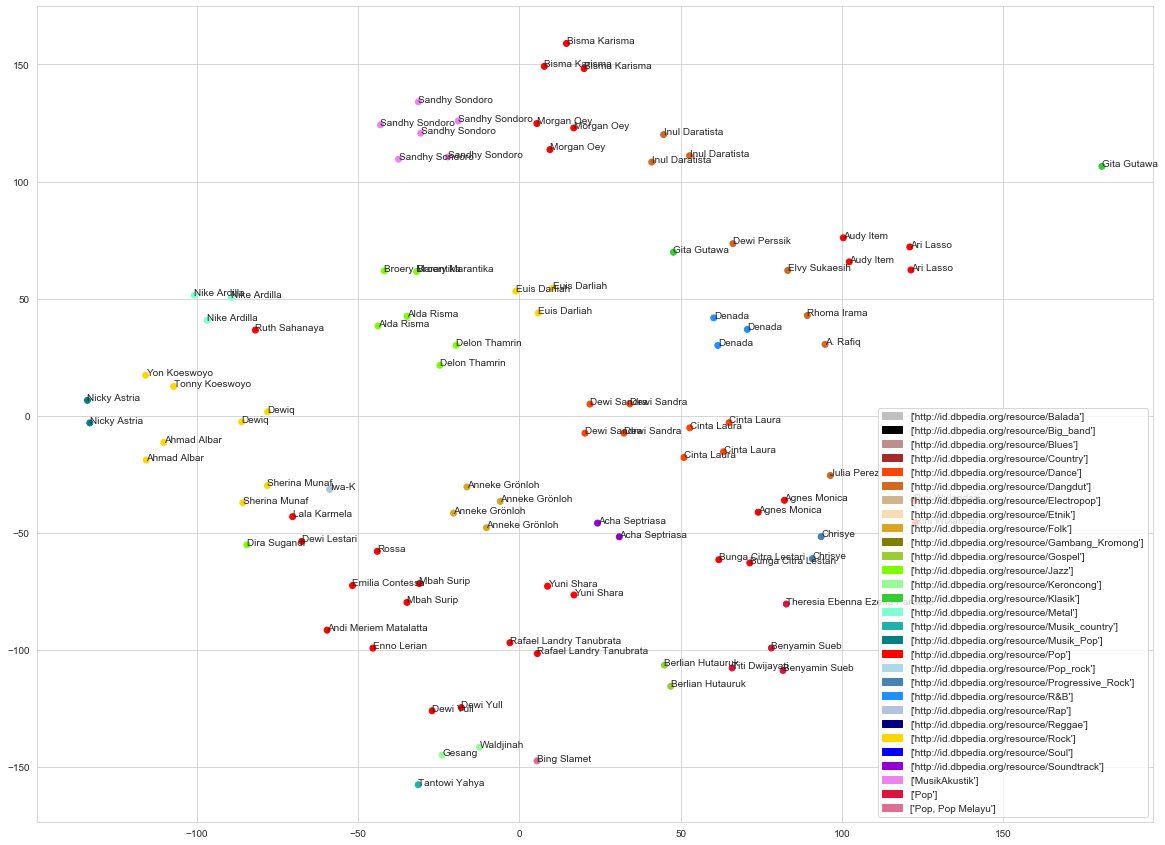

In [23]:
import matplotlib.patches as mpatches
figure = plt.figure(figsize=(20, 15))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
i=0
for penyanyiku in nodepenyanyi:
    ax.annotate(penyanyiku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    i=i+1
genre_legend = [mpatches.Patch(color=color, label=df.genre.unique())
for df.genre, color in warna_genre.items()]
ax.legend(handles=genre_legend);